In [3]:
import yfinance as yf

doge_data = yf.download('ETH-INR')

doge_data.to_csv('ETH.csv')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [2]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 32.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.8/109.8 kB 2.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.9-cp311-cp311-linux_x86_64.whl size=886629 sha256=1cd4f4f2006e8eb73da42e488bf904624ff1d64a8ca056a060a48e5803bb99f5
  Stored in directory: /root/.cache/pip/wheels/f4/14/e4/50c88c865833085aeb91e2bd40e3a683ff434806386b8ee7bc
Successfully built peewee


In [31]:
df = pd.read_csv('DOGE.csv')  # Use your actual BTC file name
df = df.dropna()
df = df.iloc[2:]  # Remove first two rows if needed
data = df['Close'].values.reshape(-1, 1)
df.to_csv('DOGE.csv')

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 17s 401ms/step - loss: 0.0086 - val_loss: 0.0027
Epoch 2/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 382ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 3/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - loss: 0.0018 - val_loss: 0.0041
Epoch 4/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - loss: 0.0013 - val_loss: 0.0023
Epoch 5/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - loss: 0.0012 - val_loss: 0.0020
Epoch 6/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - loss: 0.0014 - val_loss: 0.0034
Epoch 7/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 369ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 9/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step - loss: 0.0012 - val_loss: 0.0015
Epoch 10/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - loss: 0.0012 - val_loss: 0.0013
Epoch 11/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 371ms/step - loss: 7.2890e-04 - val_loss: 0.0018
Epoch 12/50
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms

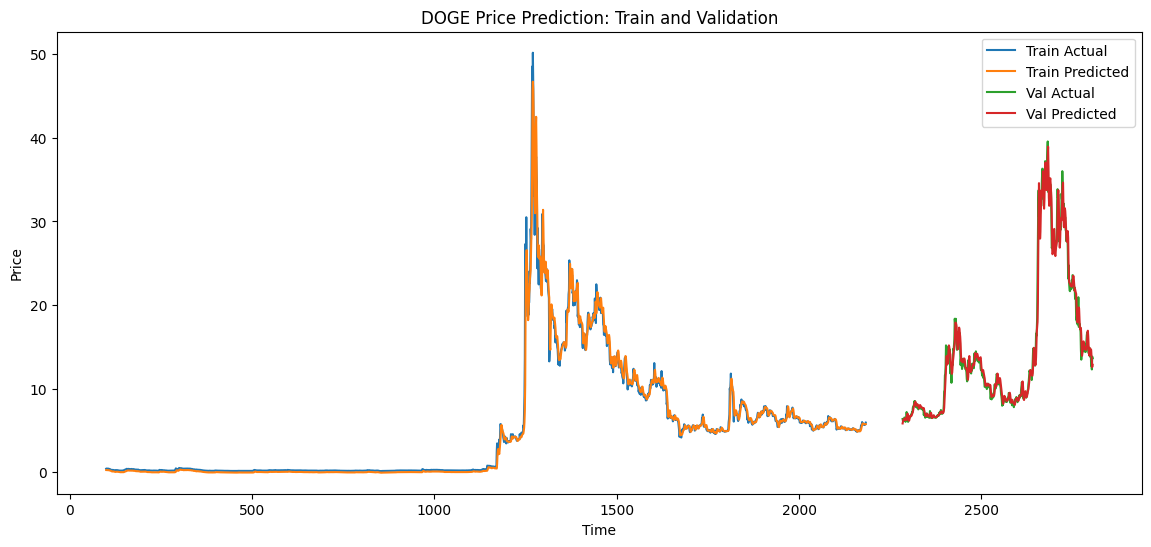

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Load Bitcoin data
df = pd.read_csv('DOGE.csv')  # Use your actual BTC file name
df = df.dropna()
df = df.iloc[2:]  # Remove first two rows if needed
data = df['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Hyperparameters
lookback = 100

# Prepare sequences
X, y = [], []
for i in range(lookback, len(scaled_data)):
    X.append(scaled_data[i-lookback:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape for LSTM [samples, timesteps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Build LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop])

# Predictions
train_predict = model.predict(X_train)
val_predict = model.predict(X_val)

# Inverse transform to original prices
train_predict = scaler.inverse_transform(train_predict)
val_predict = scaler.inverse_transform(val_predict)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))

# Plot results
plt.figure(figsize=(14,6))
plt.plot(range(lookback, lookback + len(y_train_actual)), y_train_actual, label='Train Actual')
plt.plot(range(lookback, lookback + len(train_predict)), train_predict, label='Train Predicted')
plt.plot(range(len(y_train_actual) + 2*lookback, len(y_train_actual) + 2*lookback + len(y_val_actual)), y_val_actual, label='Val Actual')
plt.plot(range(len(y_train_actual) + 2*lookback, len(y_train_actual) + 2*lookback + len(val_predict)), val_predict, label='Val Predicted')
plt.title('DOGE Price Prediction: Train and Validation')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

# Evaluate accuracy
mse = mean_squared_error(y_val_actual, val_predict)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_val_actual, val_predict)
r2 = r2_score(y_val_actual, val_predict)

print(f"📊 Evaluation Metrics:")
print(f" - RMSE: {rmse}")
print(f" - MAE : {mae}")
print(f" - R²   : {r2}")

📊 Evaluation Metrics:
 - RMSE: 1.1893903384954247
 - MAE : 0.733971318979373
 - R²   : 0.9801430473336502


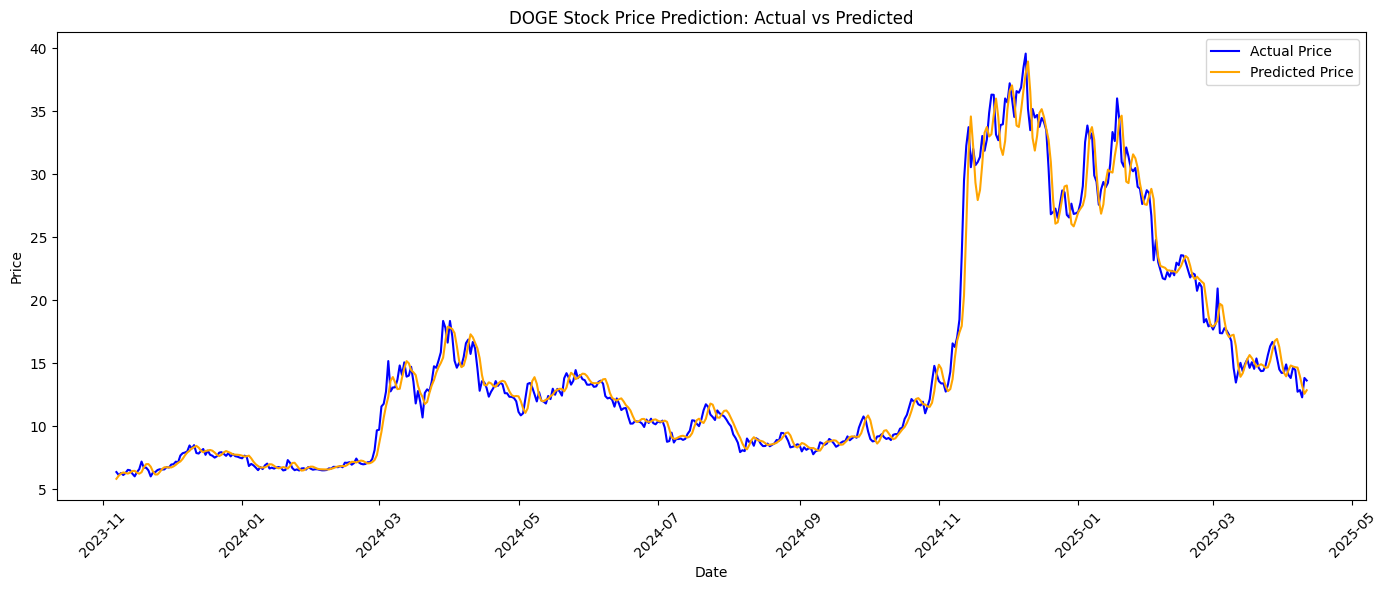

In [36]:
dates = pd.to_datetime(df['Price'].values)
val_dates = dates[-len(y_val_actual):]

# Plot with dates
plt.figure(figsize=(14,6))
plt.plot(val_dates, y_val_actual, label='Actual Price', color='blue')
plt.plot(val_dates, val_predict, label='Predicted Price', color='orange')
plt.title("DOGE Stock Price Prediction: Actual vs Predicted")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
from sklearn.preprocessing import MinMaxScaler

# Extract 'Close' column and reshape
close_prices = df[['Close']].values  # Assuming df is your full dataframe

# Fit the scaler on 'Close' prices`
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(close_prices)


In [38]:
future_input = scaled_data[-60:].reshape(1, 60, 1)  # Last 60 values
future_predictions = []

for _ in range(10):
    pred = model.predict(future_input)[0][0]
    future_predictions.append(pred)

    # Append prediction and slide window
    future_input = np.append(future_input[:,1:,:], [[[pred]]], axis=1)

# Inverse transform predictions to get actual price
future_predictions_actual = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 567ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [39]:
future_predictions_actual

array([[13.561531],
       [14.070371],
       [14.329637],
       [14.430715],
       [14.456024],
       [14.457282],
       [14.464604],
       [14.494199],
       [14.551874],
       [14.635556]], dtype=float32)

In [40]:
# Save model architecture and weights
model.save("doge_lstm_model.h5")
print("✅ Model saved as aapl_lstm_model.h5")


✅ Model saved as aapl_lstm_model.h5


In [41]:
import pandas as pd
from datetime import datetime, timedelta

# Ensure your Date column is in datetime format
df['Date'] = pd.to_datetime(df['Price'])

# Define start and end dates
start_date = pd.to_datetime('2024-04-01')
end_date = datetime.today() - timedelta(days=1)

# Filter the DataFrame
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Optional: Reset index
filtered_df = filtered_df.reset_index(drop=True)

# Display the new DataFrame
print(filtered_df.tail())


     Unnamed: 0       Price      Close       High        Low       Open  \
370        2705  2025-04-06  14.453979  14.672326  14.230198  14.645369   
371        2706  2025-04-07  12.730680  14.518553  12.525995  14.454006   
372        2707  2025-04-08  12.861587  13.121533  11.282408  12.730680   
373        2708  2025-04-09  12.283034  13.508577  12.231716  12.861571   
374        2709  2025-04-10  13.825371  14.133844  11.808612  12.283166   

           Volume       Date  
370   51947621078 2025-04-06  
371  108403982612 2025-04-07  
372  302101253246 2025-04-08  
373  158165550155 2025-04-09  
374  195302444195 2025-04-10  


In [42]:
filtered_df = filtered_df.drop(columns=['Price'])

In [43]:
filtered_df.to_csv("doge_filtered_apr2024_to_apr2025.csv", index=False)

In [44]:
# Convert columns to numeric (in case they were read as strings)
filtered_df['Close'] = pd.to_numeric(filtered_df['Close'], errors='coerce')
filtered_df['Volume'] = pd.to_numeric(filtered_df['Volume'], errors='coerce')

# Convert Date column to datetime and format as "Mon D"
filtered_df['Date'] = pd.to_datetime(filtered_df['Date'])
filtered_df['formatted_date'] = filtered_df['Date'].dt.strftime('%b %-d')

# Calculate 7-day and 30-day moving averages on Close
filtered_df['ma7'] = filtered_df['Close'].rolling(window=7).mean()
filtered_df['ma30'] = filtered_df['Close'].rolling(window=30).mean()

# Drop rows with NaN values in MA columns to keep output clean
filtered_df_clean = filtered_df.dropna(subset=['ma7', 'ma30'])

# Create JS-style objects
price_data = [{'date': row['formatted_date'], 'price': round(row['Close'], 2)} for _, row in filtered_df.iterrows()]
volume_data = [{'date': row['formatted_date'], 'volume': int(row['Volume'])} for _, row in filtered_df.iterrows()]
ma_data = [{'date': row['formatted_date'], 'price': round(row['Close'], 2),
            'ma7': round(row['ma7'], 2), 'ma30': round(row['ma30'], 2)} for _, row in filtered_df_clean.iterrows()]

price_data[:3], volume_data[:3], ma_data[:3]  # Show a preview

([{'date': 'Apr 1', 'price': 18.35},
  {'date': 'Apr 2', 'price': 17.15},
  {'date': 'Apr 3', 'price': 15.2}],
 [{'date': 'Apr 1', 'volume': 201343255429},
  {'date': 'Apr 2', 'volume': 284288592169},
  {'date': 'Apr 3', 'volume': 321378785813}],
 [{'date': 'Apr 30', 'price': 11.97, 'ma7': 12.49, 'ma30': 14.2},
  {'date': 'May 1', 'price': 11.13, 'ma7': 12.17, 'ma30': 13.96},
  {'date': 'May 2', 'price': 10.85, 'ma7': 11.92, 'ma30': 13.75}])

In [46]:
# Load the filtered dataframe from April 2024 to April 2025
df = pd.read_csv("doge_filtered_apr2024_to_apr2025.csv", parse_dates=["Date"])
df["Month"] = df["Date"].dt.month
df["MonthName"] = df["Date"].dt.strftime("%b")
df["Day"] = df["Date"].dt.day

# Group by month and sample 3 random dates from each month
sampled_df = df.groupby(["Month", "MonthName"]).apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)
sampled_df = sampled_df.sort_values(by="Date")  # Sort by actual date for correct ordering

# Convert to MMM D format for frontend
sampled_df["formatted_date"] = sampled_df["Date"].dt.strftime("%b %-d")

# Build the priceData and volumeData
price_data = [{"date": row["formatted_date"], "price": round(row["Close"], 2)} for _, row in sampled_df.iterrows()]
volume_data = [{"date": row["formatted_date"], "volume": int(row["Volume"])} for _, row in sampled_df.iterrows()]

price_data, volume_data

<ipython-input-46-fe3007866b02>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(["Month", "MonthName"]).apply(lambda x: x.sample(n=3, random_state=42)).reset_index(drop=True)


([{'date': 'Apr 16', 'price': 13.48},
  {'date': 'Apr 17', 'price': 13.05},
  {'date': 'Apr 20', 'price': 13.03},
  {'date': 'May 16', 'price': 12.97},
  {'date': 'May 24', 'price': 13.29},
  {'date': 'May 28', 'price': 14.06},
  {'date': 'Jun 16', 'price': 11.41},
  {'date': 'Jun 24', 'price': 10.22},
  {'date': 'Jun 28', 'price': 10.59},
  {'date': 'Jul 16', 'price': 10.47},
  {'date': 'Jul 24', 'price': 10.91},
  {'date': 'Jul 28', 'price': 11.02},
  {'date': 'Aug 16', 'price': 8.42},
  {'date': 'Aug 24', 'price': 9.46},
  {'date': 'Aug 28', 'price': 8.31},
  {'date': 'Sep 16', 'price': 8.63},
  {'date': 'Sep 24', 'price': 9.04},
  {'date': 'Sep 28', 'price': 10.36},
  {'date': 'Oct 16', 'price': 9.88},
  {'date': 'Oct 24', 'price': 11.64},
  {'date': 'Oct 28', 'price': 12.14},
  {'date': 'Nov 16', 'price': 32.02},
  {'date': 'Nov 24', 'price': 36.31},
  {'date': 'Nov 28', 'price': 33.9},
  {'date': 'Dec 16', 'price': 34.46},
  {'date': 'Dec 24', 'price': 27.59},
  {'date': 'Dec 28'